In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import omicverse as ov

/home/zqzhao/software/anaconda3/envs/plot/lib/python3.9/site-packages/omicverse/utils/_data.py:268: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.8, Tutorials: https://omicverse.readthedocs.io/


In [2]:
dataset_name = 'share_skin'

In [3]:
hidden = np.load(f'/home/zqzhao/workplace/OSMVC-master/latent/{dataset_name}_glb_vector.npy')
hidden.shape

(4619, 1000)

In [4]:
hidden = sc.AnnData(X=hidden)
y = sc.read_h5ad("/home/zqzhao/workplace/Multi_omics_unet/dataset/share_skin/rna_part.h5ad").obs['cell_type'].values
hidden.obs['label'] = y.astype(str)
sc.tl.pca(hidden, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(hidden, use_rep="X_pca")
sc.tl.umap(hidden)
# sc.pl.umap(hidden, color='label', title='scEDCA', show=False) #palette='Set1'
# plt.savefig(f'/home/zqzhao/workplace/OSMVC-master/plot/{dataset_name}_umap.svg', bbox_inches='tight')

In [6]:
pred = np.load(f'/home/zqzhao/workplace/OSMVC-master/latent/{dataset_name}_target_pred.npy')
pred

array([4, 1, 3, ..., 0, 0, 2])

In [7]:
hidden

AnnData object with n_obs × n_vars = 4619 × 1000
    obs: 'label'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [8]:
hidden.obs['pred'] = pred.astype(str)
hidden.obs['pred'] = hidden.obs['pred'].astype('category')

In [9]:
atac_adata = sc.read_h5ad('/home/zqzhao/workplace/Multi_omics_unet/dataset/share_skin/atac_part.h5ad')

In [10]:
rna_adata = sc.read_h5ad('/home/zqzhao/workplace/Multi_omics_unet/dataset/share_skin/rna_part.h5ad')

In [18]:
rna_adata.obs.index

Index(['R1.01.R2.03.R3.28.P1.53', 'R1.01.R2.03.R3.73.P1.56',
       'R1.01.R2.04.R3.90.P1.53', 'R1.01.R2.05.R3.79.P1.54',
       'R1.01.R2.05.R3.85.P1.55', 'R1.01.R2.10.R3.78.P1.55',
       'R1.01.R2.10.R3.79.P1.55', 'R1.01.R2.16.R3.05.P1.53',
       'R1.01.R2.17.R3.84.P1.54', 'R1.01.R2.21.R3.41.P1.53',
       ...
       'R1.96.R2.65.R3.60.P1.54', 'R1.96.R2.75.R3.59.P1.55',
       'R1.96.R2.75.R3.72.P1.54', 'R1.96.R2.75.R3.85.P1.56',
       'R1.96.R2.78.R3.25.P1.54', 'R1.96.R2.80.R3.33.P1.55',
       'R1.96.R2.81.R3.02.P1.53', 'R1.96.R2.82.R3.67.P1.54',
       'R1.96.R2.90.R3.70.P1.54', 'R1.96.R2.91.R3.67.P1.54'],
      dtype='object', length=4619)

In [13]:
hidden.obs['clusters'] = y.astype(str)
hidden.obs['clusters'] = hidden.obs['clusters'].astype('category')

In [14]:
hidden.obs['clusters'] = y.astype(str)
hidden.obs['clusters'] = hidden.obs['clusters'].astype('category')

In [16]:
hidden.obs['label']

0       K6+ Bulge Companion Layer
1                 alowCD34+ bulge
2                         Isthmus
3                             ORS
4                 alowCD34+ bulge
                  ...            
4614    K6+ Bulge Companion Layer
4615              alowCD34+ bulge
4616                          ORS
4617                          ORS
4618             ahighCD34+ bulge
Name: label, Length: 4619, dtype: category
Categories (5, object): ['Isthmus', 'K6+ Bulge Companion Layer', 'ORS', 'ahighCD34+ bulge', 'alowCD34+ bulge']

In [17]:
part_hidden = hidden[hidden.obs['label'].isin(['ahighCD34+ bulge', 'K6+ Bulge Companion Layer', 'ORS']), :]
part_hidden

View of AnnData object with n_obs × n_vars = 2587 × 1000
    obs: 'label', 'pred', 'clusters'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [43]:
traj2=ov.single.TrajInfer(part_hidden,basis='X_umap',use_rep='X_pca',n_comps=50)
traj2.set_origin_cells('ahighCD34+ bulge')
traj2.inference(method='diffusion_map')

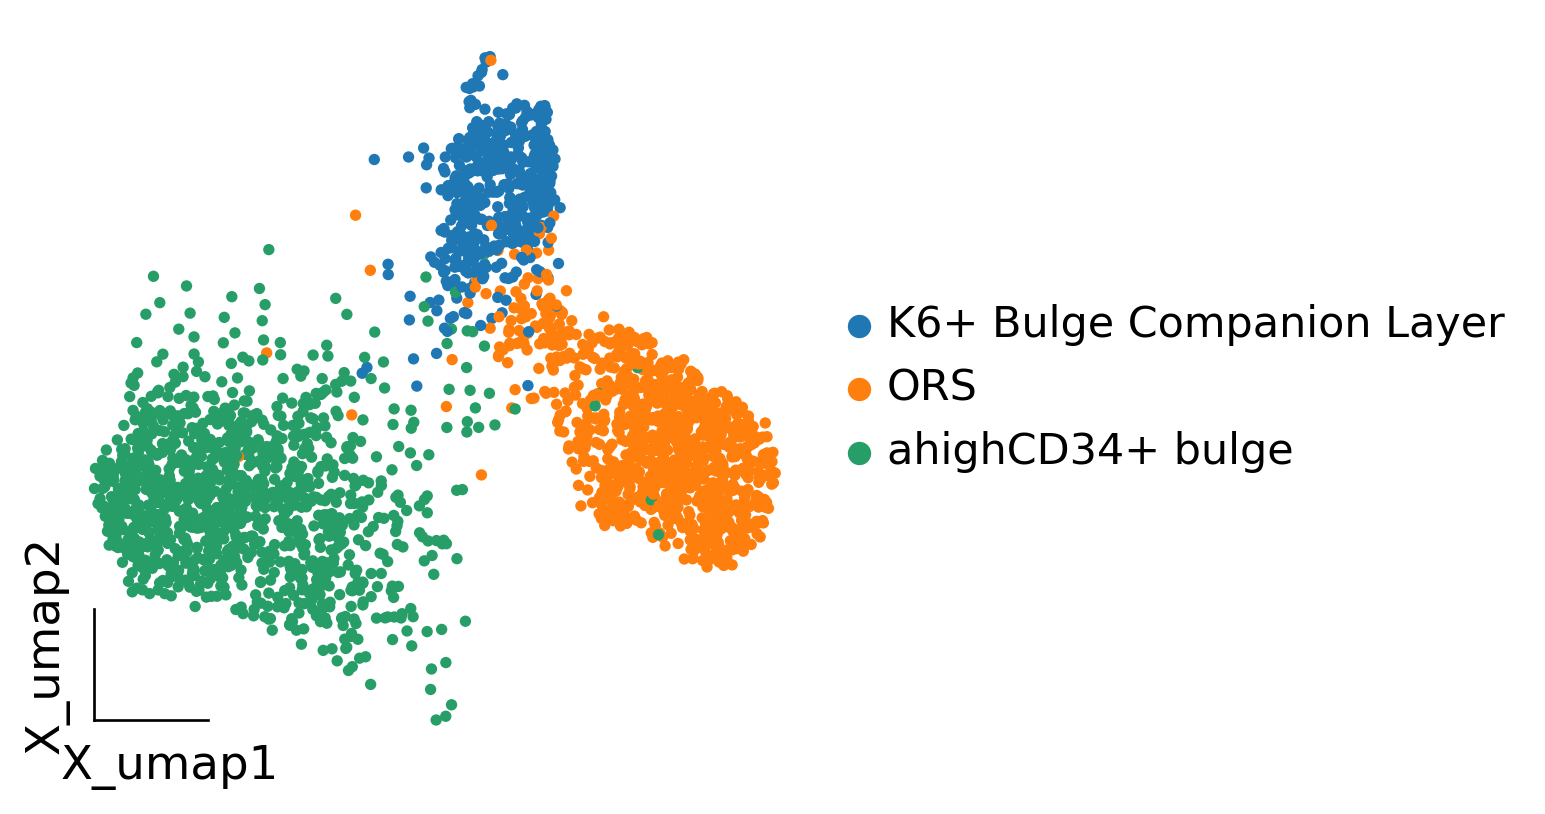

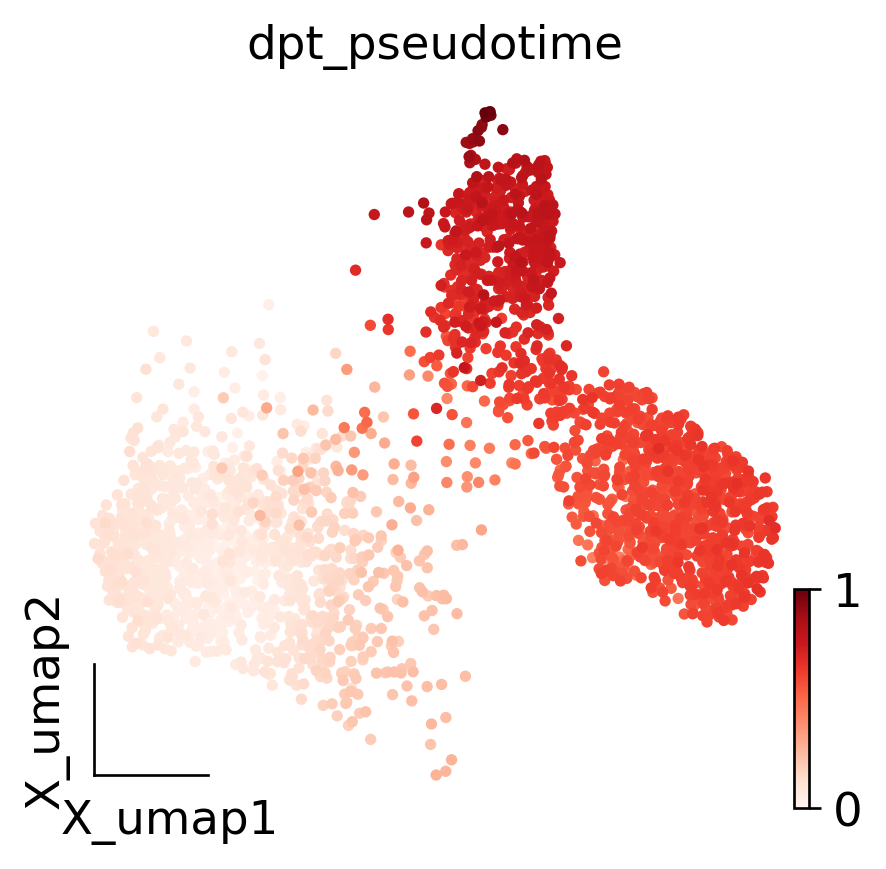

In [47]:
ov.pl.embedding(part_hidden,basis='X_umap',
                   color=['clusters'],
                   frameon='small',cmap='Reds',
                   title='',
                   save='skin_paga_part.svg')

ov.pl.embedding(part_hidden,basis='X_umap',
                   color=['dpt_pseudotime'],
                   frameon='small',cmap='Reds',
                   save='dpt_pseudotime.svg')

running PAGA using priors: ['dpt_pseudotime']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


<AxesSubplot: title={'center': 'PAGA LTNN-graph'}>

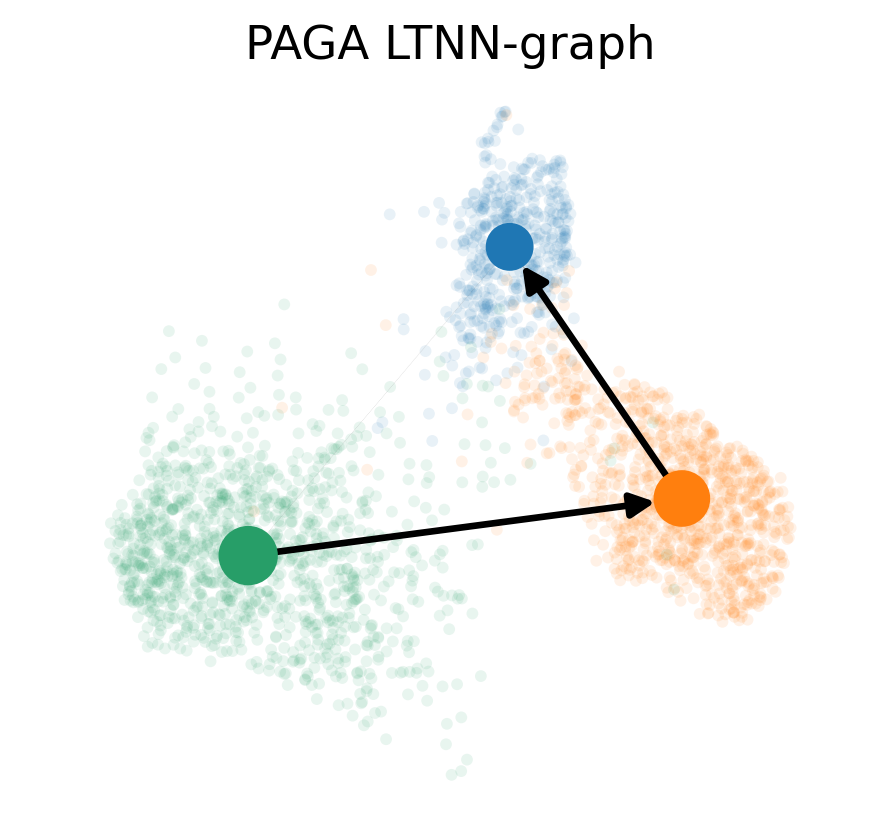

In [45]:
ov.utils.cal_paga(part_hidden,use_time_prior='dpt_pseudotime',vkey='paga',
                 groups='clusters')
ov.utils.plot_paga(part_hidden,basis='umap', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)

In [49]:
ov.utils.plot_paga(part_hidden,basis='umap', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False,
            save='paga_linn_graph.svg')

saving figure to file ./figures/scvelo_paga_linn_graph.svg


<AxesSubplot: title={'center': 'PAGA LTNN-graph'}>